In [66]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from math import *
from scipy import stats
%matplotlib inline 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [67]:
file = 'hpdata.dat'
DIM=3
levs_per_deg = 4 # number of data points per degree
num_of_degs = 4
dof = []
degree = []
degree_dbl = []
elems = []
l2_norm = []
log_l2_norm = []
h = []
log_h = []
log10_h = []
log_elems = []
with open(file, 'r',encoding='ascii') as f:
    print(f)
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        #print(row[13])
        #dof.append(float(row[3]))
        elems.append(int(row[1]))
        degree.append(int(row[5]))
        l2_norm.append(float(row[13]))
        #dg_norm.append(float(row[5]))
        #cg_iter.append(row[7])
        #log_cg_iter.append(log(float(cg_iter[-1])))
        log_l2_norm.append(log(l2_norm[-1] + .0000000000000000001))
        #log_dg_norm.append(log(dg_norm[-1]))
        #log10_dg_norm.append(log_dg_norm[-1]/log(10))
        #h.append(1./sqrt( float(row[2]))) # h = 1/sqrt(K)
        h.append(pow( float(row[1]),-1./float(DIM))) # h = 1/sqrt(K)
        log_h.append(log( h[-1] ))
        #log10_h.append(log_h[-1]/log(10))
        #log_elems.append( log( float(elems[-1]) ) )
        degree_dbl.append( float(degree[-1]))
        #log_degree_dbl.append( log(degree_dbl[-1]))
        #dof_pow1o2.append( pow(float(dof[-1]), 1./2.))
        #dof_pow1o3.append( pow(float(dof[-1]), 1./3.))
        print(row[1],row[5],row[13])

   

<_io.TextIOWrapper name='hpdata.dat' mode='r' encoding='ascii'>
1 1 0.0000000000000000000000000
8 1 0.0583875633541290350869701
64 1 0.0178224406193261339370615
512 1 0.0044424135302622048959709
1 2 0.0145810047224588425901493
8 2 0.0031650359348973132814220
64 2 0.0004165943229406950218570
512 2 0.0000509880216697525880413
1 3 0.0047975822849572295758502
8 3 0.0001771092244500724614993
64 3 0.0000078598935727285812068
512 3 0.0000002640432292058923625
1 4 0.0003392482985210607915154
8 4 0.0000070596018726932906900
64 4 0.0000003099682248176153129
512 4 0.0000000105918150549204487
1 5 0.0000354019856292374761613
8 5 0.0000006725039343147482285
64 5 0.0000000064224297458460959
512 5 0.0000000000523356695395260
1 6 0.0000048430016799209296881
8 6 0.0000000170499472774705070
64 6 0.0000000001764474933106167
512 6 0.0000000000014900572709872


24
e ~ Ch^p       C = 0.286856       p = 2.00428
e ~ Ch^p       C = 0.027810       p = 3.03041
e ~ Ch^p       C = 0.006965       p = 4.89566
e ~ Ch^p       C = 0.000265       p = 4.87110
e ~ Ch^p       C = 0.000097       p = 6.93918
e ~ Ch^p       C = 0.000002       p = 6.88773


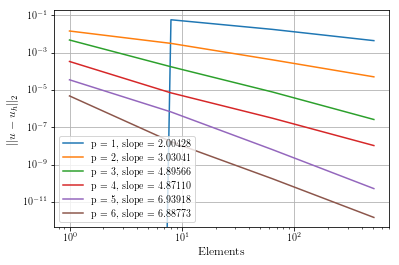

In [74]:
levs_per_deg = 4
degs_per_lev = 6
points = len(l2_norm)
print(points)
lines = int(points / levs_per_deg)
stride = 0
lr_bump = levs_per_deg - 2
for i in range(lines):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(log_h[(stride+lr_bump):(stride+levs_per_deg)]),np.asarray(log_l2_norm[(stride+lr_bump):(stride+levs_per_deg)]))    
    leg_label='p = ' + format(degree[stride]) + ", slope = " + format(slope, '.5f') 
    plt.plot(elems[stride:(stride+levs_per_deg)], l2_norm[stride:(stride+levs_per_deg)],label=leg_label)
    print('e ~ Ch^p       ' + 'C = ' + format(exp(intercept), 'f') + '       p = ' + format(slope, '.5f'))
    stride = stride + levs_per_deg
    plt.xlabel('Elements',fontsize=12)
plt.ylabel(r'$||u-u_h||_2$',fontsize=12)
plt.yscale('log')
plt.xscale('log')
plt.legend(loc=0, prop={'size':10})
plt.grid()
plt.savefig('hp_convergence_1.png',rasterized=True, dpi=600)
plt.show()


4
e ~ Cexp(-Dp)       C = 1.437574       D = 2.0929
e ~ Cexp(-Dp)       C = 1.301687       D = 2.9837
e ~ Cexp(-Dp)       C = 0.556824       D = 3.6459
e ~ Cexp(-Dp)       C = 0.207867       D = 4.3223


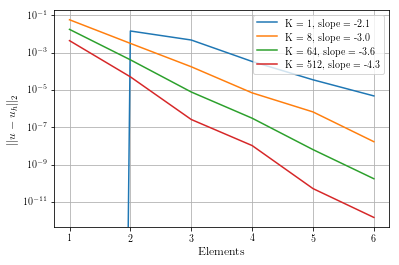

In [73]:
lines = int(points/degs_per_lev)
stride = 0
print(lines)
init_stride = levs_per_deg
for i in range(lines):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(degree_dbl[init_stride + stride::levs_per_deg]),np.asarray(log_l2_norm[init_stride + stride::levs_per_deg]))    
    leg_label='K = ' + format(elems[stride]) + ", slope = " + format(slope, '.1f') 
    plt.plot(degree[stride::levs_per_deg], l2_norm[stride::levs_per_deg],label=leg_label)
    print('e ~ Cexp(-Dp)       ' + 'C = ' + format(exp(intercept), 'f') + '       D = ' + format(-log(exp(slope)), '.4f'))
    stride = stride + 1
plt.legend(loc=0, prop={'size':10})
plt.ylabel(r'$||u-u_h||_2$',fontsize=12)
plt.xlabel('Elements',fontsize=12)
plt.yscale('log')
plt.grid()
plt.savefig('hp_convergence_2.png',rasterized=True, dpi=600)
plt.show()